In [439]:
import numpy as np
from scipy import fft
from scipy.optimize import fsolve
from math import *
import random
from matplotlib import pyplot as plt

In [440]:
def gauss(x, A, sigma):
    return A * np.exp(-(x ** 2) / (sigma ** 2))

In [441]:
def rho_func(x, u1, u2, step, T, d, e):
    m = np.arange(0, len(u1))
    mult = step / len(u1)
    squ = 1 + (2 * pi * m / T) ** 2
    beta = mult * np.sum((x ** 2) * squ * (abs(u1) ** 2) / ((abs(u2) ** 2) * (step ** 2) + x * squ) ** 2, 0)
    gamma = mult * np.sum(abs(u2) ** 2 * step ** 2 * abs(u1) ** 2 * squ / (abs(u2) ** 2 * step ** 2 + x * (1 + 2 * pi * m / T) ** 2) ** 2, 0)
    return beta - (d + e * sqrt(gamma)) ** 2

In [442]:
def tikhonov_filt(u1, u2, step, T, d, e):
    m = np.arange(0, len(u1))
    mult = step / len(u1)
    squ = 1 + (2 * pi * m / T) ** 2
    alpha = fsolve(lambda x: rho_func(x, u1, u2, step, T, d, e), 1)[0]
    h = np.arange(0, len(u1)).tolist()
    
    for k in range(1, len(h) + 1):
        h[k - 1] = mult * np.sum(np.exp(2 * pi * 1j * k * m / len(u1)) * u1 * np.conj(u2) / (abs(u2) ** 2 * (step ** 2) + alpha * squ), 0)
        
    return np.array(h)

In [443]:
A = 1.0
s1 = 1.0
s2 = 2.0
mult = 6
step = 0.009
NS = 0.05

In [444]:
t = np.arange(-mult, mult, step)

In [445]:
u1 = gauss(t, A, s1)
u2 = gauss(t, A, s2)

In [446]:
v1 = fft.fft(u1)
v2 = fft.fft(u2)

In [447]:
n1 = np.random.uniform(-NS, NS, len(t))
n2 = np.random.uniform(-NS, NS, len(t))

In [448]:
delta = np.std(n1)
epsilon = np.std(n2)

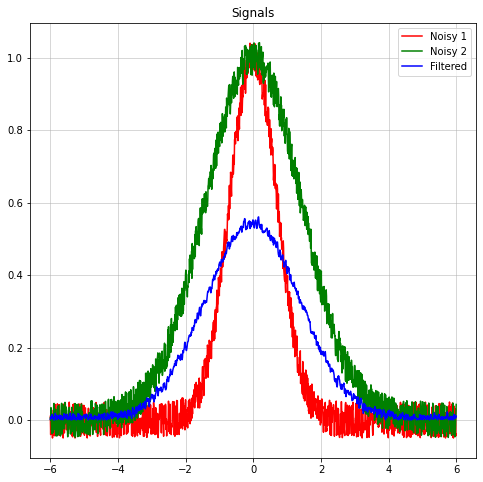

In [449]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Signals')
plt.plot(t, u1 + n1, color='r', label='Noisy 1')
plt.plot(t, u2 + n2, color='g', label='Noisy 2')
plt.plot(t, np.abs(fft.ifft(fft.fft(u2 + n2) * tikhonov_filt(v1, v2, step, 2 * mult, delta, epsilon))), color='b', label='Filtered')
plt.legend()